# Mục mới

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [17]:
df = pd.read_csv('BNB-USD.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

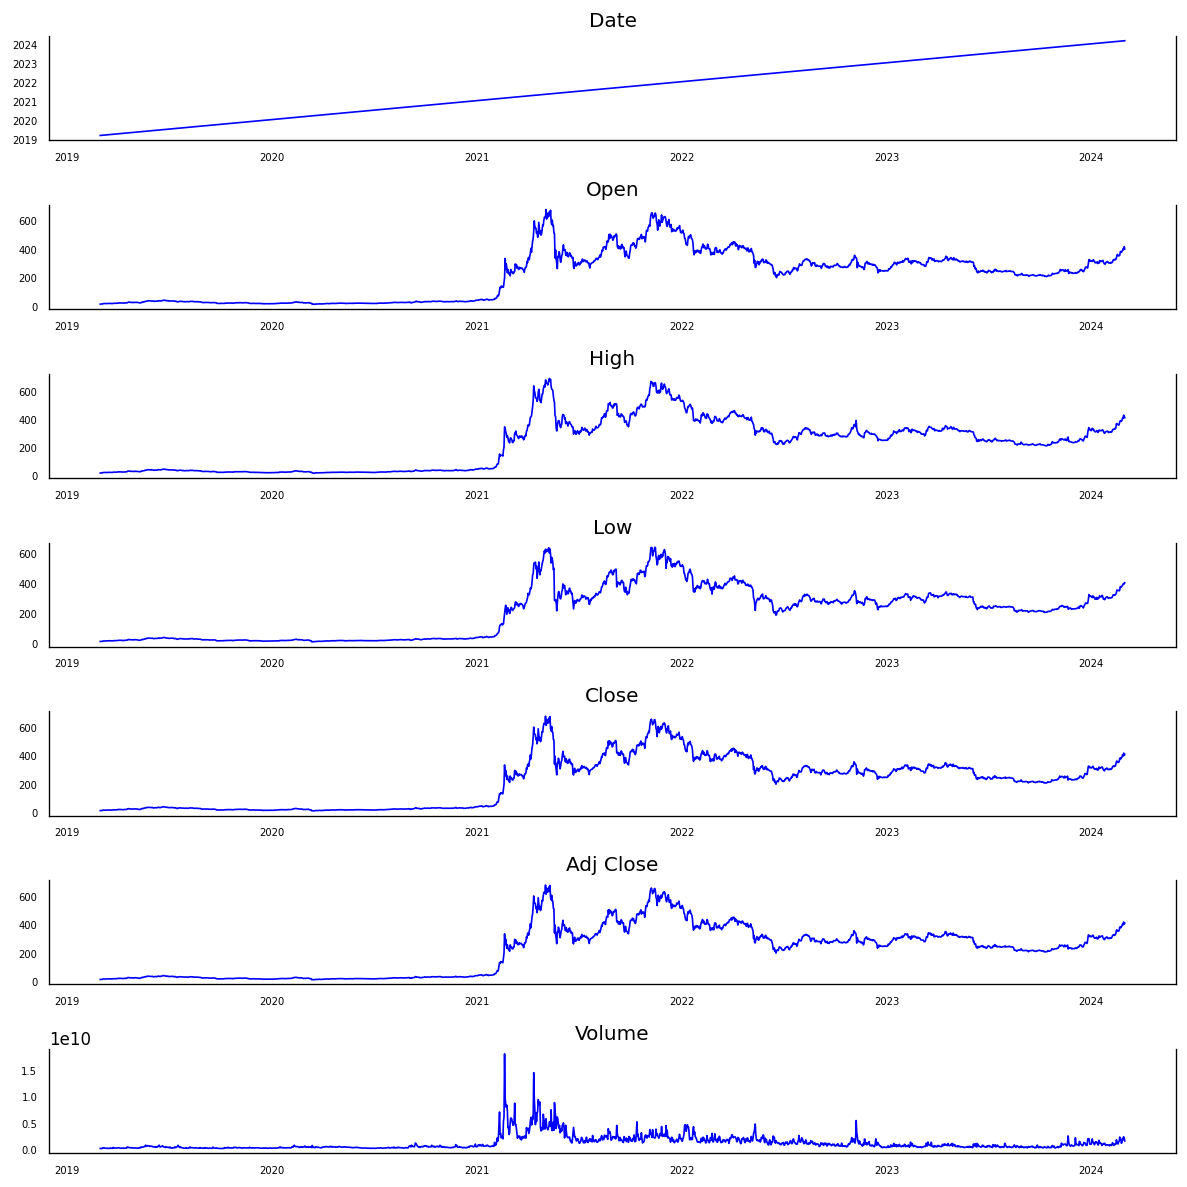

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(df.Date, data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

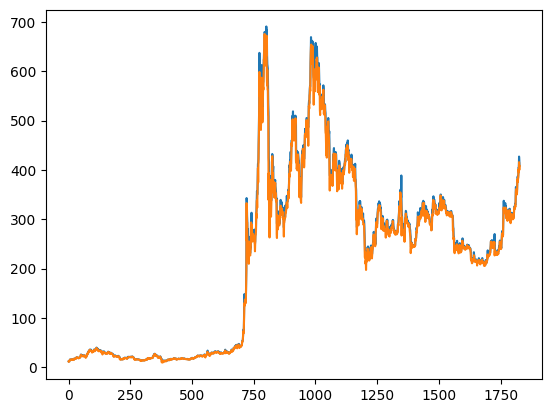

In [20]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

In [21]:
# 9:1
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]



In [22]:
# Chọn các cột 'Open', 'High', 'Low', 'Close', 'Adj Close', và 'Volume' từ DataFrame
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
time_series = df[cols]

# Chia dữ liệu thành tập train và tập test
train_data = time_series[:int(0.9*len(time_series))]
test_data = time_series[int(0.9*len(time_series)):]

In [23]:
# Xây dựng mô hình VAR
model = VAR(train_data)

In [24]:
# Phù hợp mô hình với dữ liệu train và chọn một giá trị tự động cho order
model = VAR(train_data)
fitted_model = model.fit()

In [25]:
train_data

,Open,High,Low,Close,Adj Close,Volume
0,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...
1640,216.369949,219.539185,216.080399,218.358002,218.358002,325410553
1641,218.358246,218.970016,215.850189,218.718567,218.718567,332786869
1642,218.721512,233.060013,217.047867,226.862885,226.862885,593296661
1643,226.870148,227.049011,221.978149,223.799438,223.799438,359750612


In [26]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

# Chọn các cột 'Open', 'High', 'Low', 'Close', 'Adj Close', và 'Volume' từ DataFrame
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_series = df[cols]

# Áp dụng hàm adfuller_test cho từng cột
for col in data_series.columns:
    adfuller_test(data_series[col], name=col)

    Augmented Dickey-Fuller Test on "Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7296
 No. Lags Chosen       = 25
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.416. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6601
 No. Lags Chosen       = 18
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.4518. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "Low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

In [27]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [28]:
# lag_order = 9
fitted_model = model.fit(9)
lag_order = fitted_model.k_ar
predictions = fitted_model.forecast(train_data.values[-lag_order:], steps=len(test_data))

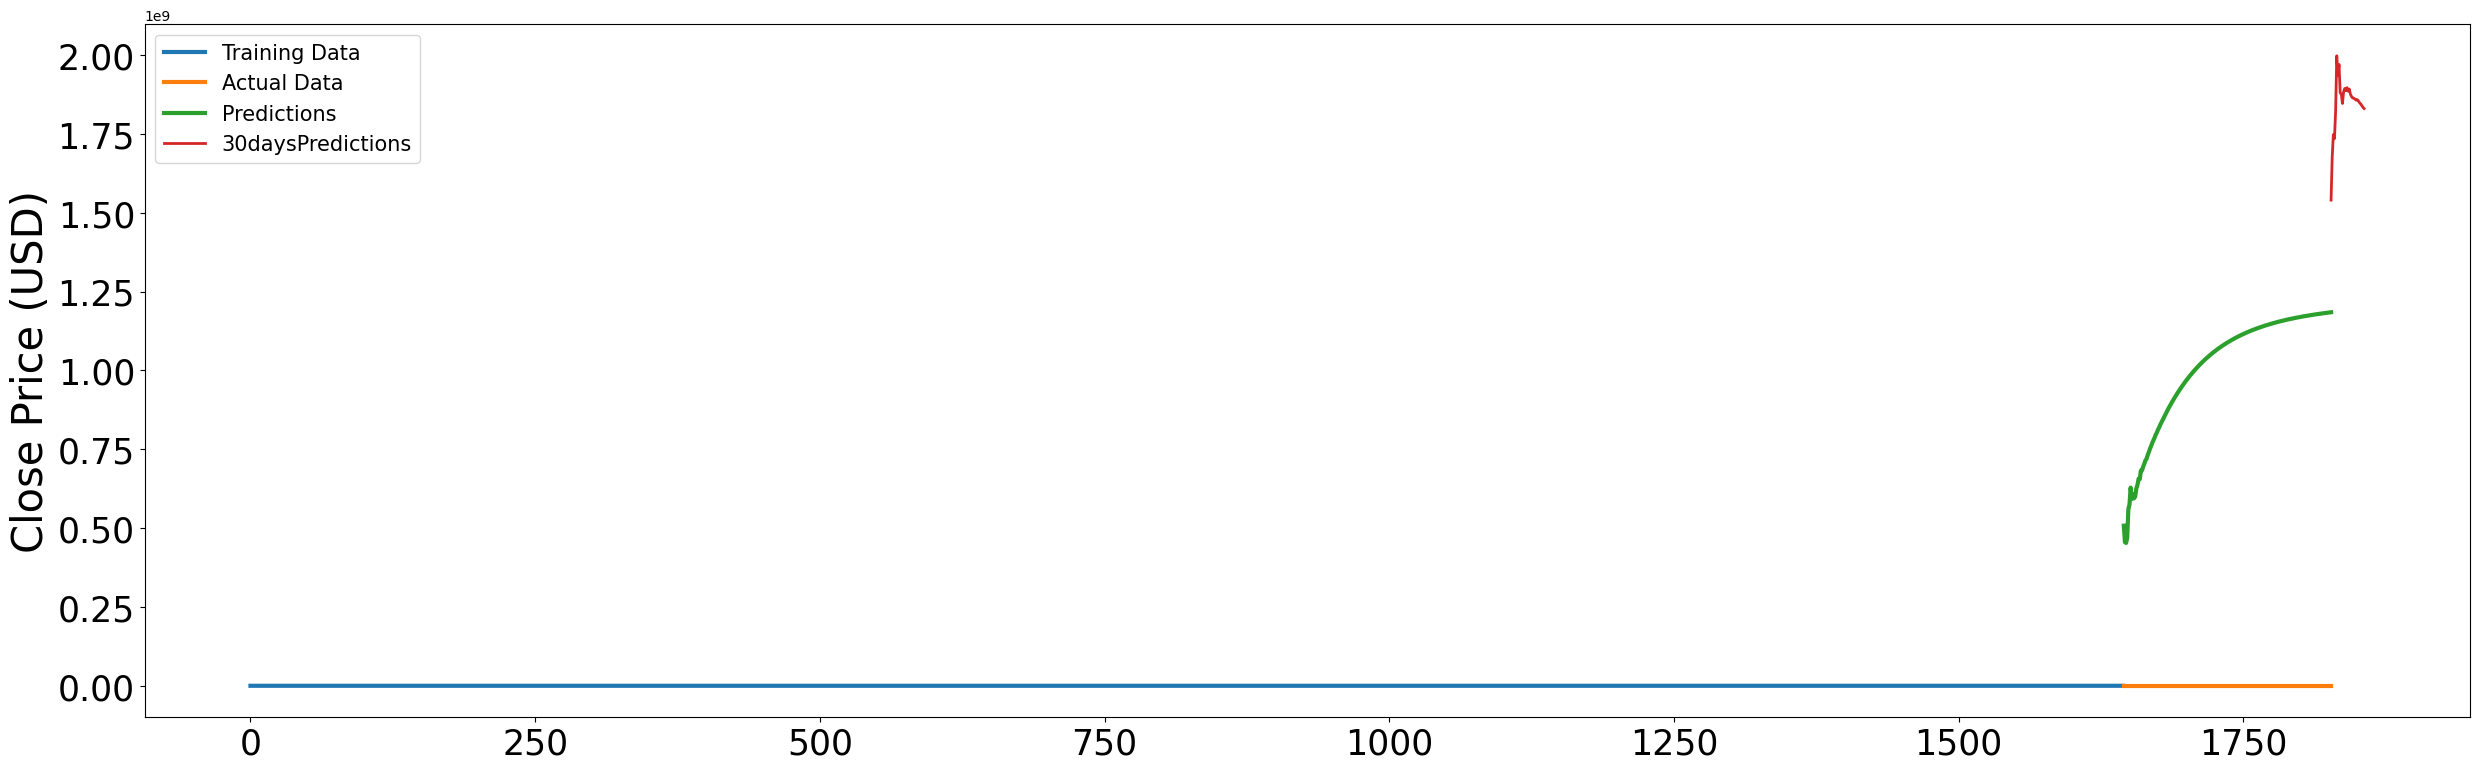

In [29]:
plt.figure(figsize=(30, 9))
plt.plot(train_data.index, train_data.Close, label='Training Data', linewidth=3)
plt.plot(test_data.index, test_data.Close, label='Actual Data', linewidth=3)
plt.plot(test_data.index, predictions[:,5], label='Predictions', linewidth=3)

# Dự đoán 30 ngày tiếp theo
predictions_future = fitted_model.forecast(test_data.values[-lag_order:], steps=30)
prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index, predictions_future[:,5], label='30daysPredictions', linewidth=2)


plt.ylabel('Close Price (USD)', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.show()

In [30]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

NameError: name 'x_next_30_day' is not defined